In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [7]:
df = pd.read_csv('Social_Network_Ads.csv')

In [8]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [9]:
df.tail()

,User ID,Gender,Age,EstimatedSalary,Purchased
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0
399,15594041,Female,49,36000,1


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [11]:
X = df.drop(['Purchased','User ID'], axis=1)
y = df['Purchased']

In [12]:
X.head()

,Gender,Age,EstimatedSalary
0,Male,19,19000
1,Male,35,20000
2,Female,26,43000
3,Female,27,57000
4,Male,19,76000


In [13]:
y.head()

,Purchased
0,0
1,0
2,0
3,0
4,0


In [14]:
X['Gender'] = X['Gender'].map({'Male':1,'Female':0})

In [15]:
X.head()

,Gender,Age,EstimatedSalary
0,1,19,19000
1,1,35,20000
2,0,26,43000
3,0,27,57000
4,1,19,76000


<Axes: xlabel='Age', ylabel='EstimatedSalary'>

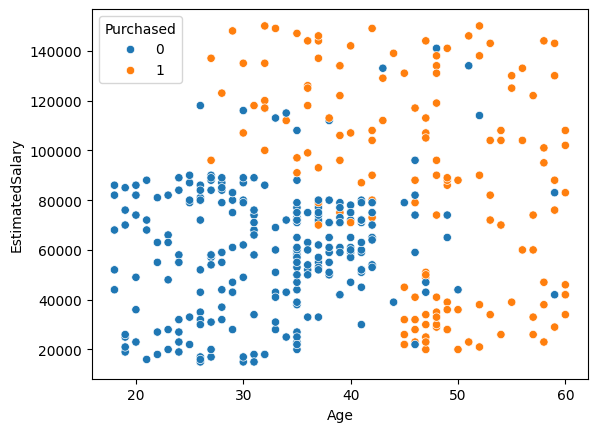

In [16]:
sns.scatterplot(x='Age', y='EstimatedSalary', hue='Purchased', data=df)

<Axes: xlabel='Gender', ylabel='EstimatedSalary'>

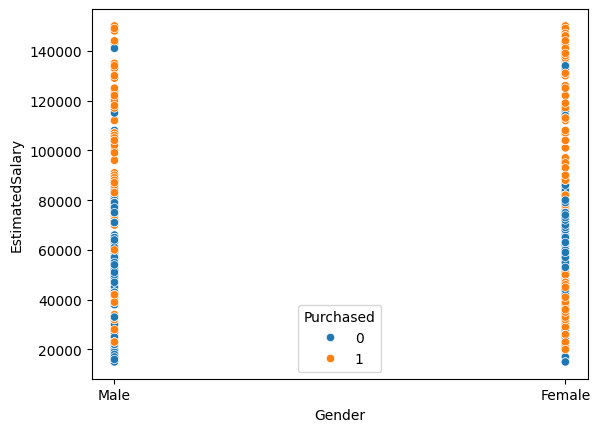

In [17]:
sns.scatterplot(x='Gender', y='EstimatedSalary', hue='Purchased', data=df)

<Axes: xlabel='Age', ylabel='Gender'>

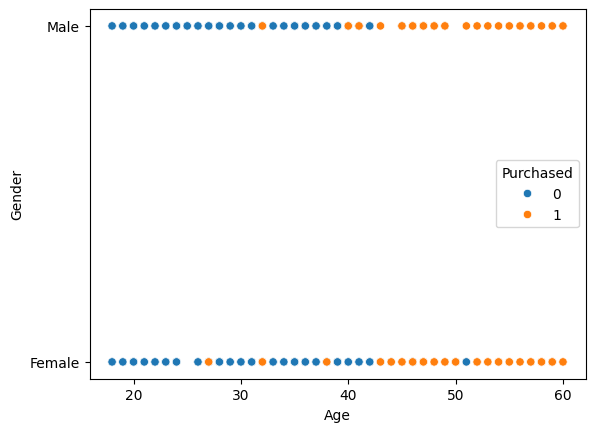

In [18]:
sns.scatterplot(x='Age', y='Gender', hue='Purchased', data=df)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [20]:
lr_model = LogisticRegression(random_state=42)

In [21]:
lr_model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [22]:
y_pred = lr_model.predict(X_test)

In [23]:
print("Accuracy Score: ",lr_model.score(X_test, y_test))

Accuracy Score:  0.8


In [24]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.92      0.86        77
           1       0.81      0.58      0.68        43

    accuracy                           0.80       120
   macro avg       0.80      0.75      0.77       120
weighted avg       0.80      0.80      0.79       120



In [25]:
confusion_matrix(y_test, y_pred)

array([[71,  6],
       [18, 25]])

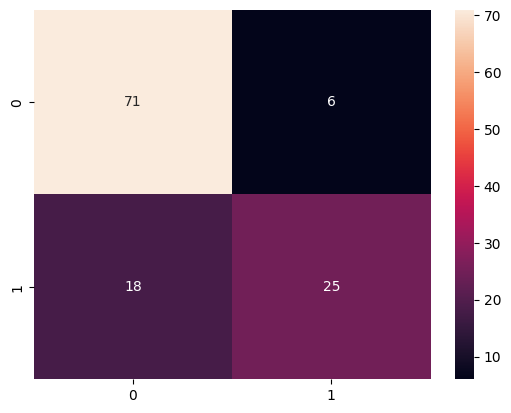

In [26]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
sns.set_style('whitegrid')